# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

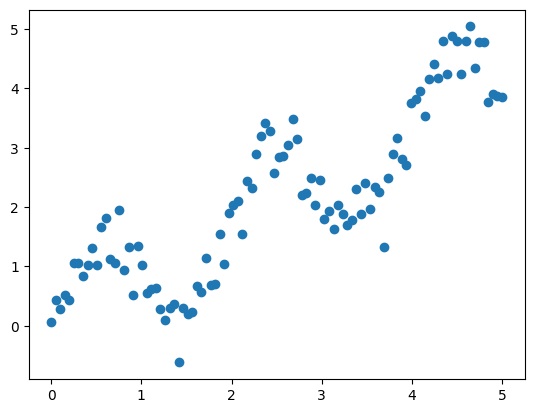

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5672787154095683


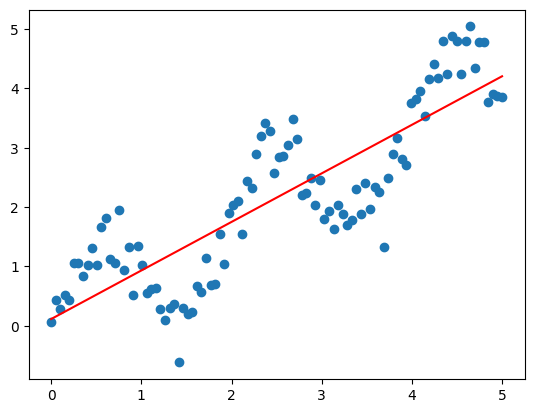

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

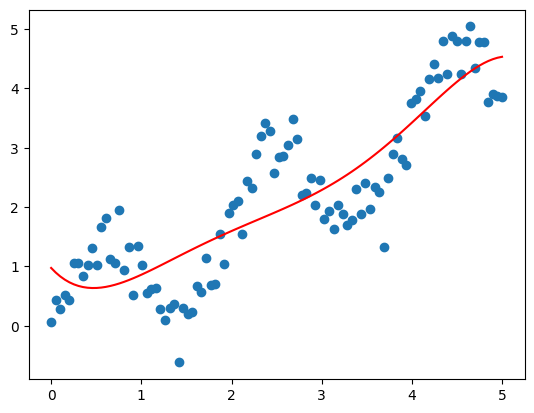

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.65245985  2.48290162 -1.17820947  0.25279547 -0.01951208]
interception:  0.9754068332246368


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.97540683, 0.89813241, 0.83263668, 0.7780672 , 0.73360945,
       0.69848606, 0.6719561 , 0.65331423, 0.64188997, 0.63704696,
       0.63818212, 0.64472494, 0.6561367 , 0.67190968, 0.69156639,
       0.71465884, 0.74076771, 0.76950165, 0.80049645, 0.83341429,
       0.867943  , 0.90379524, 0.94070777, 0.97844067, 1.01677657,
       1.05551986, 1.09449595, 1.1335505 , 1.17254862, 1.21137413,
       1.24992879, 1.28813152, 1.3259176 , 1.36323798, 1.40005844,
       1.43635885, 1.47213238, 1.50738477, 1.54213351, 1.57640712,
       1.61024434, 1.64369339, 1.67681118, 1.70966256, 1.74231951,
       1.77486045, 1.80736937, 1.83993513, 1.8726507 , 1.90561232,
       1.93891879, 1.97267069, 2.00696959, 2.04191731, 2.07761513,
       2.11416302, 2.15165889, 2.19019779, 2.22987116, 2.27076607,
       2.31296444, 2.35654225, 2.40156882, 2.44810598, 2.49620734,
       2.54591753, 2.59727139, 2.65029323, 2.70499607, 2.76138082,
       2.81943558, 2.87913481, 2.94043861, 3.00329189, 3.06762

In [15]:
regr_poly.predict(X_poly)

array([0.97540683, 0.89813241, 0.83263668, 0.7780672 , 0.73360945,
       0.69848606, 0.6719561 , 0.65331423, 0.64188997, 0.63704696,
       0.63818212, 0.64472494, 0.6561367 , 0.67190968, 0.69156639,
       0.71465884, 0.74076771, 0.76950165, 0.80049645, 0.83341429,
       0.867943  , 0.90379524, 0.94070777, 0.97844067, 1.01677657,
       1.05551986, 1.09449595, 1.1335505 , 1.17254862, 1.21137413,
       1.24992879, 1.28813152, 1.3259176 , 1.36323798, 1.40005844,
       1.43635885, 1.47213238, 1.50738477, 1.54213351, 1.57640712,
       1.61024434, 1.64369339, 1.67681118, 1.70966256, 1.74231951,
       1.77486045, 1.80736937, 1.83993513, 1.8726507 , 1.90561232,
       1.93891879, 1.97267069, 2.00696959, 2.04191731, 2.07761513,
       2.11416302, 2.15165889, 2.19019779, 2.22987116, 2.27076607,
       2.31296444, 2.35654225, 2.40156882, 2.44810598, 2.49620734,
       2.54591753, 2.59727139, 2.65029323, 2.70499607, 2.76138082,
       2.81943558, 2.87913481, 2.94043861, 3.00329189, 3.06762

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

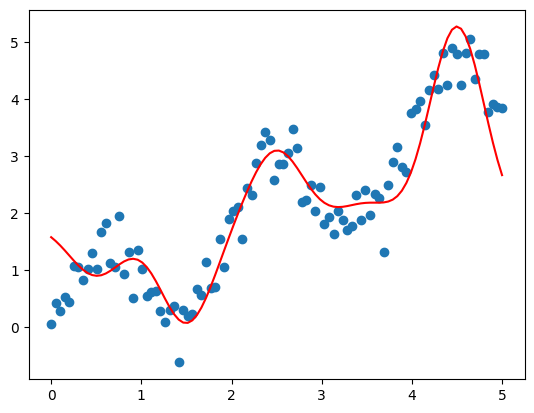

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.89214556 -1.72881785  1.30262126  0.36155805  3.46779102]
interception:  1.8004288631790069


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

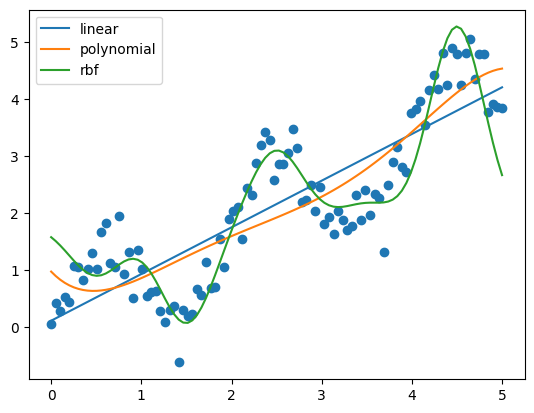

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5672787154095683


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5029456237215681


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2556788609324039
